In [1]:
import array
import random
import numpy
import matplotlib.pyplot as plt

In [2]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 3.8 MB/s eta 0:00:00


In [3]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

In [4]:
IND_SIZE = 10
MIN_VALUE = -1
MAX_VALUE = 1
MIN_STRATEGY = -1
MAX_STRATEGY = 1

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

In [6]:
# Individual generator
def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

In [7]:
def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

In [8]:
import numpy as np
def sumPowell(x):
  sumY = 0
  for index, xValue in enumerate(x, 1):    
    absX = np.absolute(xValue) 
    powerX = np.power(xValue, index + 1)
    sumY += powerX   
  return (sumY,)
  #return (sum(x),)

In [9]:
toolbox = base.Toolbox()
toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxUniform, indpb=0.3)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", sumPowell)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

gen	nevals	avg     	std    	min      	max    
0  	30    	0.966086	0.81692	-0.832177	3.35793
1  	176   	0.364513	0.6094 	-1.18223 	1.27213
2  	182   	-0.577309	2.77909	-15.2316 	1.21743
3  	176   	-2.05396 	4.41915	-15.2316 	0.599603
4  	186   	-4.94194 	6.44511	-16.0497 	-0.341395
5  	177   	-10.5041 	7.00447	-17.4323 	-0.711943
6  	179   	-24.9612 	25.9824	-106.566 	-1.50231 
7  	183   	-50.1967 	37.9111	-107.478 	-15.7445 
8  	185   	-90.6745 	28.7762	-108.05  	-16.143  
9  	178   	-114.774 	23.3341	-180.855 	-69.5418 
10 	183   	-211.399 	276.765	-1240.93 	-106.566 
11 	179   	-308.203 	371.775	-1294.67 	-107.535 
12 	182   	-653.144 	543.91 	-1303.48 	-161.197 
13 	189   	-1019.42 	458.723	-1303.48 	-180.957 
14 	184   	-1294.4  	72.3609	-1660.67 	-1240.97 
15 	178   	-1310.13 	65.075 	-1659.79 	-1293.75 
16 	186   	-1341.71 	118.201	-1712.95 	-1294.67 
17 	181   	-1614.38 	952.063	-5137.39 	-1294.67 
18 	181   	-2027.06 	1402.08	-5146.74 	-1303.91 
19 	179   	-3817.06 	2769.91	-15

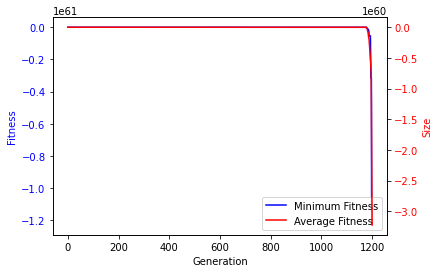

gen	nevals	avg     	std     	min     	max    
0  	30    	0.825545	0.959645	-1.59218	3.01919
1  	184   	0.28938 	0.664982	-1.59218	1.59917
2  	179   	-0.262484	0.591468	-1.43501	0.709026
3  	182   	-0.885627	0.599067	-2.33997	-0.0473771
4  	175   	-3.98882 	11.6482 	-66.2914	-0.330949 
5  	174   	-7.53776 	15.7925 	-66.3   	-0.859083 
6  	174   	-12.5413 	22.268  	-72.1781	-1.82486  
7  	182   	-35.3728 	72.029  	-392.754	-2.31986  
8  	180   	-57.4582 	94.067  	-392.47 	-4.28417  
9  	180   	-149.471 	143.281 	-456.488	-8.17913  
10 	181   	-279.706 	164.555 	-457.349	-61.6095  
11 	179   	-437.294 	32.6477 	-504.447	-392.171  
12 	185   	-575.602 	433.376 	-2194.33	-397.781  
13 	183   	-5301.05 	11637.7 	-34934.9	-457.273  
14 	181   	-10228.2 	14937.5 	-35041  	-471.129  
15 	177   	-18439.6 	16555.4 	-35046.8	-457.217  
16 	181   	-28458.2 	13096   	-35046.6	-2241.73  
17 	183   	-42560.8 	40551.5 	-260937 	-34982.5  
18 	188   	-65184   	76793   	-260984 	-35040.5  
19 	187   	-10

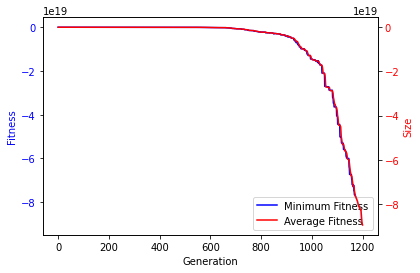

gen	nevals	avg     	std     	min      	max    
0  	30    	0.848784	0.634998	-0.225415	2.62615
1  	178   	0.390402	0.436229	-0.429637	1.51599
2  	172   	0.0910662	0.302636	-0.601001	0.675858
3  	175   	-0.321002	0.273802	-1.01365 	0.155741
4  	178   	-0.650294	0.28662 	-1.34166 	-0.150103
5  	175   	-0.853761	0.285516	-1.38852 	-0.391297
6  	176   	-1165.88 	6272.41 	-34943.8 	-0.568824
7  	184   	-3495.68 	10482.7 	-34944   	-1.01411 
8  	183   	-6990.34 	13976.8 	-34944.1 	-1.14961 
9  	176   	-13979.1 	17117.8 	-34944.3 	-1.41246 
10 	182   	-25626.6 	15451.8 	-34947.1 	-1.49465 
11 	171   	-34951.8 	23.4747 	-35034.3 	-34936   
12 	176   	-36729.4 	9462.22 	-87684.5 	-34944.2 
13 	180   	-36748   	9458.77 	-87684.5 	-34944.3 
14 	176   	-38620.8 	13141.1 	-87766.6 	-34944.4 
15 	181   	-40536.7 	15758.9 	-87777.6 	-35037.1 
16 	177   	-120618  	203293  	-726336  	-35037.4 
17 	184   	-162843  	223108  	-726336  	-35037.4 
18 	175   	-329455  	303165  	-728607  	-87766.6 
19 	171   	

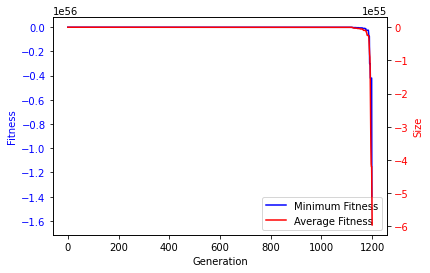

gen	nevals	avg     	std     	min      	max    
0  	30    	0.684897	0.601245	-0.800855	2.05895
1  	186   	0.35764 	0.418745	-0.389051	1.06634
2  	182   	0.00679183	0.385806	-0.598238	0.654124
3  	180   	-0.231116 	0.379479	-1.07304 	0.565597
4  	182   	-0.605911 	0.444794	-2.40056 	0.175173
5  	184   	-0.809747 	0.253564	-1.53283 	-0.238691
6  	177   	-1.02552  	0.219372	-1.71666 	-0.721343
7  	180   	-1.18803  	0.247376	-1.94687 	-0.862038
8  	182   	-1.48557  	0.364192	-2.08816 	-1.07456 
9  	175   	-1.74595  	0.318466	-2.13977 	-1.09633 
10 	178   	-2.04553  	0.240028	-3.25867 	-1.80629 
11 	179   	-2.73196  	3.33856 	-20.6387 	-1.93119 
12 	175   	-5.30434  	6.61541 	-20.7048 	-2.02316 
13 	182   	-12.3446  	8.99707 	-20.8837 	-2.0654  
14 	183   	-19.2929  	4.82893 	-22.2946 	-2.20916 
15 	178   	-20.9536  	0.383776	-22.2946 	-20.6649 
16 	183   	-21.7825  	2.36772 	-30.8592 	-20.7199 
17 	180   	-22.7867  	2.9368  	-30.7731 	-20.9377 
18 	180   	-25.7025  	3.79493 	-30.7731 	-21.2

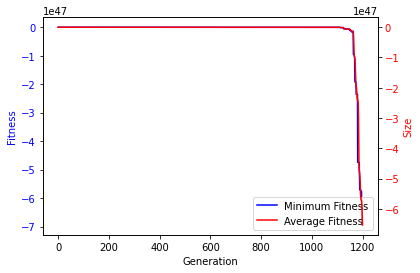

gen	nevals	avg     	std     	min     	max    
0  	30    	0.640824	0.872958	-1.32416	2.33106
1  	184   	-0.0717539	0.628356	-1.47281	1.06108
2  	181   	-79.0621  	292.683 	-1174.18	0.21948
3  	180   	-158.209  	398.53  	-1174.54	-0.447573
4  	175   	-159.402  	398.215 	-1176.1 	-1.1449  
5  	185   	-471.636  	573.939 	-1176.71	-1.54057 
6  	183   	-708.021  	574.08  	-1191.27	-0.92387 
7  	178   	-1191.76  	271.792 	-1717.76	-17.3054 
8  	184   	-1358.84  	254.649 	-1732.79	-1174.71 
9  	180   	-4615.38  	16892.4 	-95572.5	-1175.79 
10 	174   	-4848.65  	16801.2 	-95310  	-1191.34 
11 	180   	-59637.5  	277712  	-1.54989e+06	-1716.99 
12 	174   	-2.80177e+06	1.02011e+07	-4.09566e+07	-1717.75 
13 	188   	-9.79704e+06	1.71973e+07	-4.09567e+07	-1732.78 
14 	179   	-2.6316e+07 	1.92462e+07	-4.09567e+07	-1733.67 
15 	176   	-3.69703e+07	1.19609e+07	-4.09569e+07	-178214  
16 	179   	-4.09567e+07	92.1373    	-4.09569e+07	-4.09567e+07
17 	184   	-4.09568e+07	113.258    	-4.09569e+07	-4.09567e+0

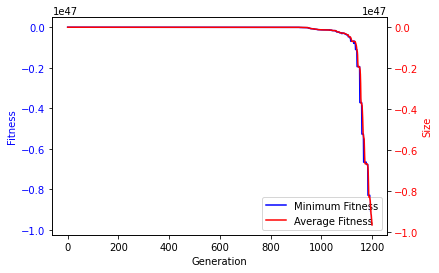

gen	nevals	avg    	std     	min      	max    
0  	30    	0.96136	0.984461	-0.588609	4.41383
1  	183   	0.236523	0.456777	-0.588609	1.05617
2  	187   	-0.161832	0.504682	-0.935061	0.746641
3  	178   	-0.753196	0.417236	-1.92354 	0.130018
4  	181   	-51.3174 	269.116 	-1500.55 	-0.58614
5  	182   	-550.953 	721.729 	-1502.34 	-1.09688
6  	182   	-1115.55 	643.778 	-1502.41 	-2.11388
7  	186   	-3838.58 	12864.8 	-73102.7 	-2.40176
8  	185   	-472969  	2.49913e+06	-1.39307e+07	-1501.56
9  	185   	-2.3408e+06	5.18323e+06	-1.39307e+07	-1502.42
10 	184   	-5.59438e+06	6.80661e+06	-1.39307e+07	-1503.23
11 	181   	-1.06972e+07	5.8611e+06 	-1.39307e+07	-73102.7
12 	179   	-1.39307e+07	0.491489   	-1.39307e+07	-1.39307e+07
13 	184   	-1.50005e+07	5.76124e+06	-4.60257e+07	-1.39307e+07
14 	183   	-1.821e+07  	1.09102e+07	-4.60257e+07	-1.39307e+07
15 	171   	-2.27921e+08	1.10478e+09	-6.17687e+09	-1.39307e+07
16 	180   	-3.21179e+07	1.59042e+07	-4.60258e+07	-1.39307e+07
17 	180   	-4.49559e+07	5.761

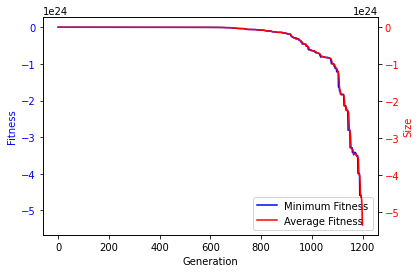

gen	nevals	avg    	std     	min      	max    
0  	30    	1.16717	0.692515	-0.294355	2.57667
1  	180   	-3851.28	20743   	-115556  	1.51227
2  	179   	-7703.55	28824.8 	-115556  	0.888029
3  	186   	-15402.6	39267.7 	-115556  	0.447451
4  	181   	-30717  	50938.4 	-115557  	0.0638561
5  	180   	-73082.3	55607.8 	-115557  	-0.155305
6  	179   	-103826 	34613.5 	-115561  	-3.72414 
7  	184   	-115471 	475.383 	-115565  	-112911  
8  	186   	-115561 	1.62003 	-115565  	-115557  
9  	173   	-115562 	1.46109 	-115569  	-115561  
10 	173   	-115562 	2.37328 	-115569  	-115561  
11 	187   	-115700 	725.392 	-119606  	-115561  
12 	185   	-115932 	1949.03 	-126427  	-115562  
13 	183   	-121000 	25084.4 	-255300  	-115562  
14 	182   	-136128 	46910.3 	-255308  	-115569  
15 	179   	-173812 	67448.4 	-266165  	-115569  
16 	176   	-234004 	50049.4 	-266165  	-116212  
17 	181   	-326584 	370774  	-2.32313e+06	-255300  
18 	175   	-398487 	514344  	-2.3229e+06 	-255344  
19 	182   	-676860 	8230

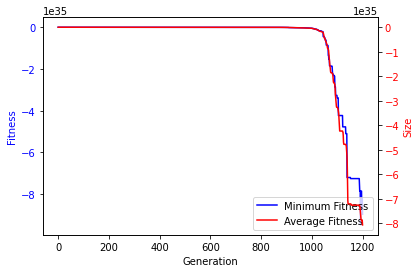

gen	nevals	avg     	std    	min      	max    
0  	30    	0.940895	0.95711	-0.223208	5.28995
1  	175   	0.2241  	0.361735	-0.540146	0.934471
2  	182   	-0.184409	0.406636	-1.00032 	0.456145
3  	179   	-334734  	1.25246e+06	-5.021e+06	0.0853289
4  	184   	-1.5063e+06	2.30091e+06	-5.021e+06	-0.146181
5  	182   	-2.67787e+06	2.50492e+06	-5.021e+06	-0.947751
6  	186   	-4.35154e+06	1.70681e+06	-5.021e+06	-1.6674  
7  	183   	-1.3114e+08 	6.79171e+08	-3.78859e+09	-5.021e+06
8  	170   	-6.35649e+08	1.41004e+09	-3.78859e+09	-5.021e+06
9  	181   	-1.6447e+09 	1.87477e+09	-3.78859e+09	-5.021e+06
10 	175   	-3.03204e+09	1.51309e+09	-3.78859e+09	-5.021e+06
11 	177   	-3.78859e+09	7.68166    	-3.78859e+09	-3.78859e+09
12 	188   	-3.78859e+09	11.4137    	-3.78859e+09	-3.78859e+09
13 	179   	-3.8675e+09 	4.24966e+08	-6.15601e+09	-3.78859e+09
14 	180   	-3.78859e+09	1423.78    	-3.78859e+09	-3.78859e+09
15 	176   	-3.78859e+09	1427.38    	-3.78859e+09	-3.78859e+09
16 	182   	-5.04534e+09	6.76781e+09	-

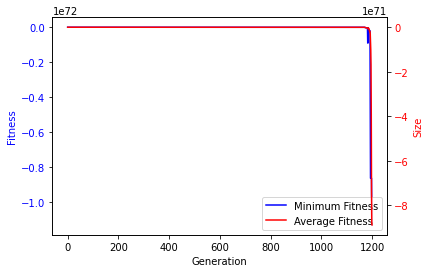

gen	nevals	avg    	std     	min     	max    
0  	30    	0.39372	0.725318	-1.69637	1.62059
1  	174   	-0.275294	0.658187	-1.69637	1.15525
2  	186   	-1.00042 	0.49868 	-1.87482	-0.124228
3  	183   	-1.31592 	0.407638	-2.0529 	-0.354819
4  	190   	-2.10108 	2.00509 	-12.7275	-0.974704
5  	180   	-3.14424 	3.19451 	-12.7258	-1.41666 
6  	181   	-6.81393 	13.1781 	-74.5106	-1.87486 
7  	173   	-26.7238 	43.955  	-173.379	-2.52598 
8  	174   	-62.0325 	57.3618 	-174.606	-3.3039  
9  	176   	-168.968 	415.338 	-2383.69	-13.9451 
10 	183   	-589.501 	898.059 	-2383.69	-74.5031 
11 	180   	-1208.93 	1098.85 	-2384.2 	-173.312 
12 	177   	-2164.68 	663.3   	-2436.68	-174.234 
13 	184   	-2504.92 	610.36  	-5790.43	-2383.69 
14 	184   	-3198.31 	1430.38 	-5791.34	-2383.79 
15 	186   	-7439.42 	15796.9 	-92067.8	-2385.33 
16 	177   	-17576.3 	29290.3 	-92067.8	-2436.89 
17 	178   	-27525.9 	35738.2 	-92067.9	-5791.34 
18 	183   	-65033.4 	39162.2 	-102742 	-5844.78 
19 	185   	-89958.4 	30593.7 	

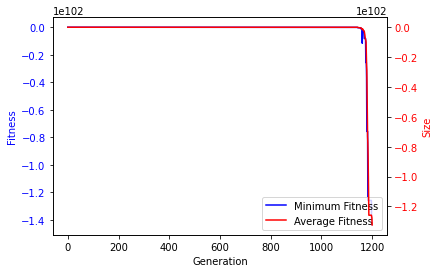

gen	nevals	avg     	std     	min    	max    
0  	30    	0.882469	0.561234	-0.1935	1.79076
1  	177   	0.348051	0.727946	-3.09698	1.33892
2  	174   	0.0406122	0.434333	-1.97284	0.465979
3  	180   	-0.528594	0.819297	-3.40376	0.24141 
4  	170   	-1.23298 	1.18411 	-3.40376	0.0709547
5  	183   	-7.16179 	18.3708 	-75.7899	-0.290799
6  	180   	-19.9924 	30.7945 	-76.1803	-0.397261
7  	179   	-30.5411 	35.475  	-79.2825	-2.28514 
8  	174   	-55.5269 	34.0196 	-79.7085	-3.39822 
9  	184   	-71.3546 	22.5062 	-79.3059	-3.86911 
10 	185   	-79.2735 	0.339607	-80.7757	-78.3125 
11 	180   	-81.6207 	7.89834 	-111.115	-79.2825 
12 	184   	-4090.25 	21533.5 	-120052 	-79.2998 
13 	181   	-4101.77 	21531.4 	-120052 	-79.3001 
14 	182   	-16102.2 	40772.4 	-120052 	-79.3051 
15 	182   	-59409.6 	111690  	-579653 	-111.121 
16 	180   	-103388  	102954  	-579653 	-111.178 
17 	183   	-181363  	156219  	-579653 	-120052  
18 	177   	-303926  	225125  	-579653 	-120052  
19 	182   	-426519  	216551  	-57

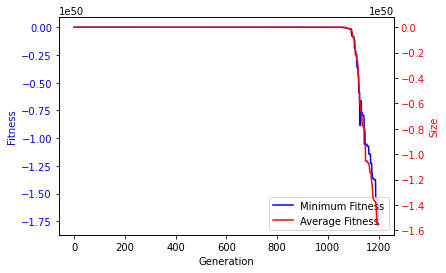

In [10]:
def main():
    random.seed()
    MU, LAMBDA = 30, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=1200, stats=stats, halloffame=hof, verbose=True)

    gen, fit_mins, size_avgs  = logbook.select("gen", "min", "avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
      tl.set_color("b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
    ax2.set_ylabel("Average Fitness", color="r")
    for tl in ax2.get_yticklabels():
      tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="lower right", frameon=True)

    plt.show()    
    
    return pop, logbook, hof
    
if __name__ == "__main__":
    for i in range(10):
       main()